# Jamboree Education - Linear Regression

### About Jamboree Eduction
* Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort. They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

### Column Profiling:
* Serial No. (Unique row ID)
* GRE Scores (out of 340)
* TOEFL Scores (out of 120)
* University Rating (out of 5)
* Statement of Purpose and Letter of Recommendation Strength (out of 5)
* Undergraduate GPA (out of 10)
* Research Experience (either 0 or 1)
* Chance of Admit (ranging from 0 to 1)

### Problem Statment: 
* Analyse the predictor variables to draw insights about the importance of various factors in prediction of chances of graduate admission and how they are related to each other.

## Analysing basic metrics

In [1]:
#importing different libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from scipy import stats

In [2]:
#Loading of dataset
df = pd.read_csv("../scaler/Jamboree_Admission.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.shape #to observe shape of data

(500, 9)

* Dataset is of 500 rows and 9 attributes.

In [4]:
df.info() #to observe the data type 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
df.isnull().sum() #missing or null values in data

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

* There are no missing values in the data.

In [7]:
df['Serial No.'].nunique()

500

In [8]:
# Remove serial number as it is not a feature required for prediction
df.drop(columns=['Serial No.'], inplace=True)

In [9]:
df.nunique()

GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

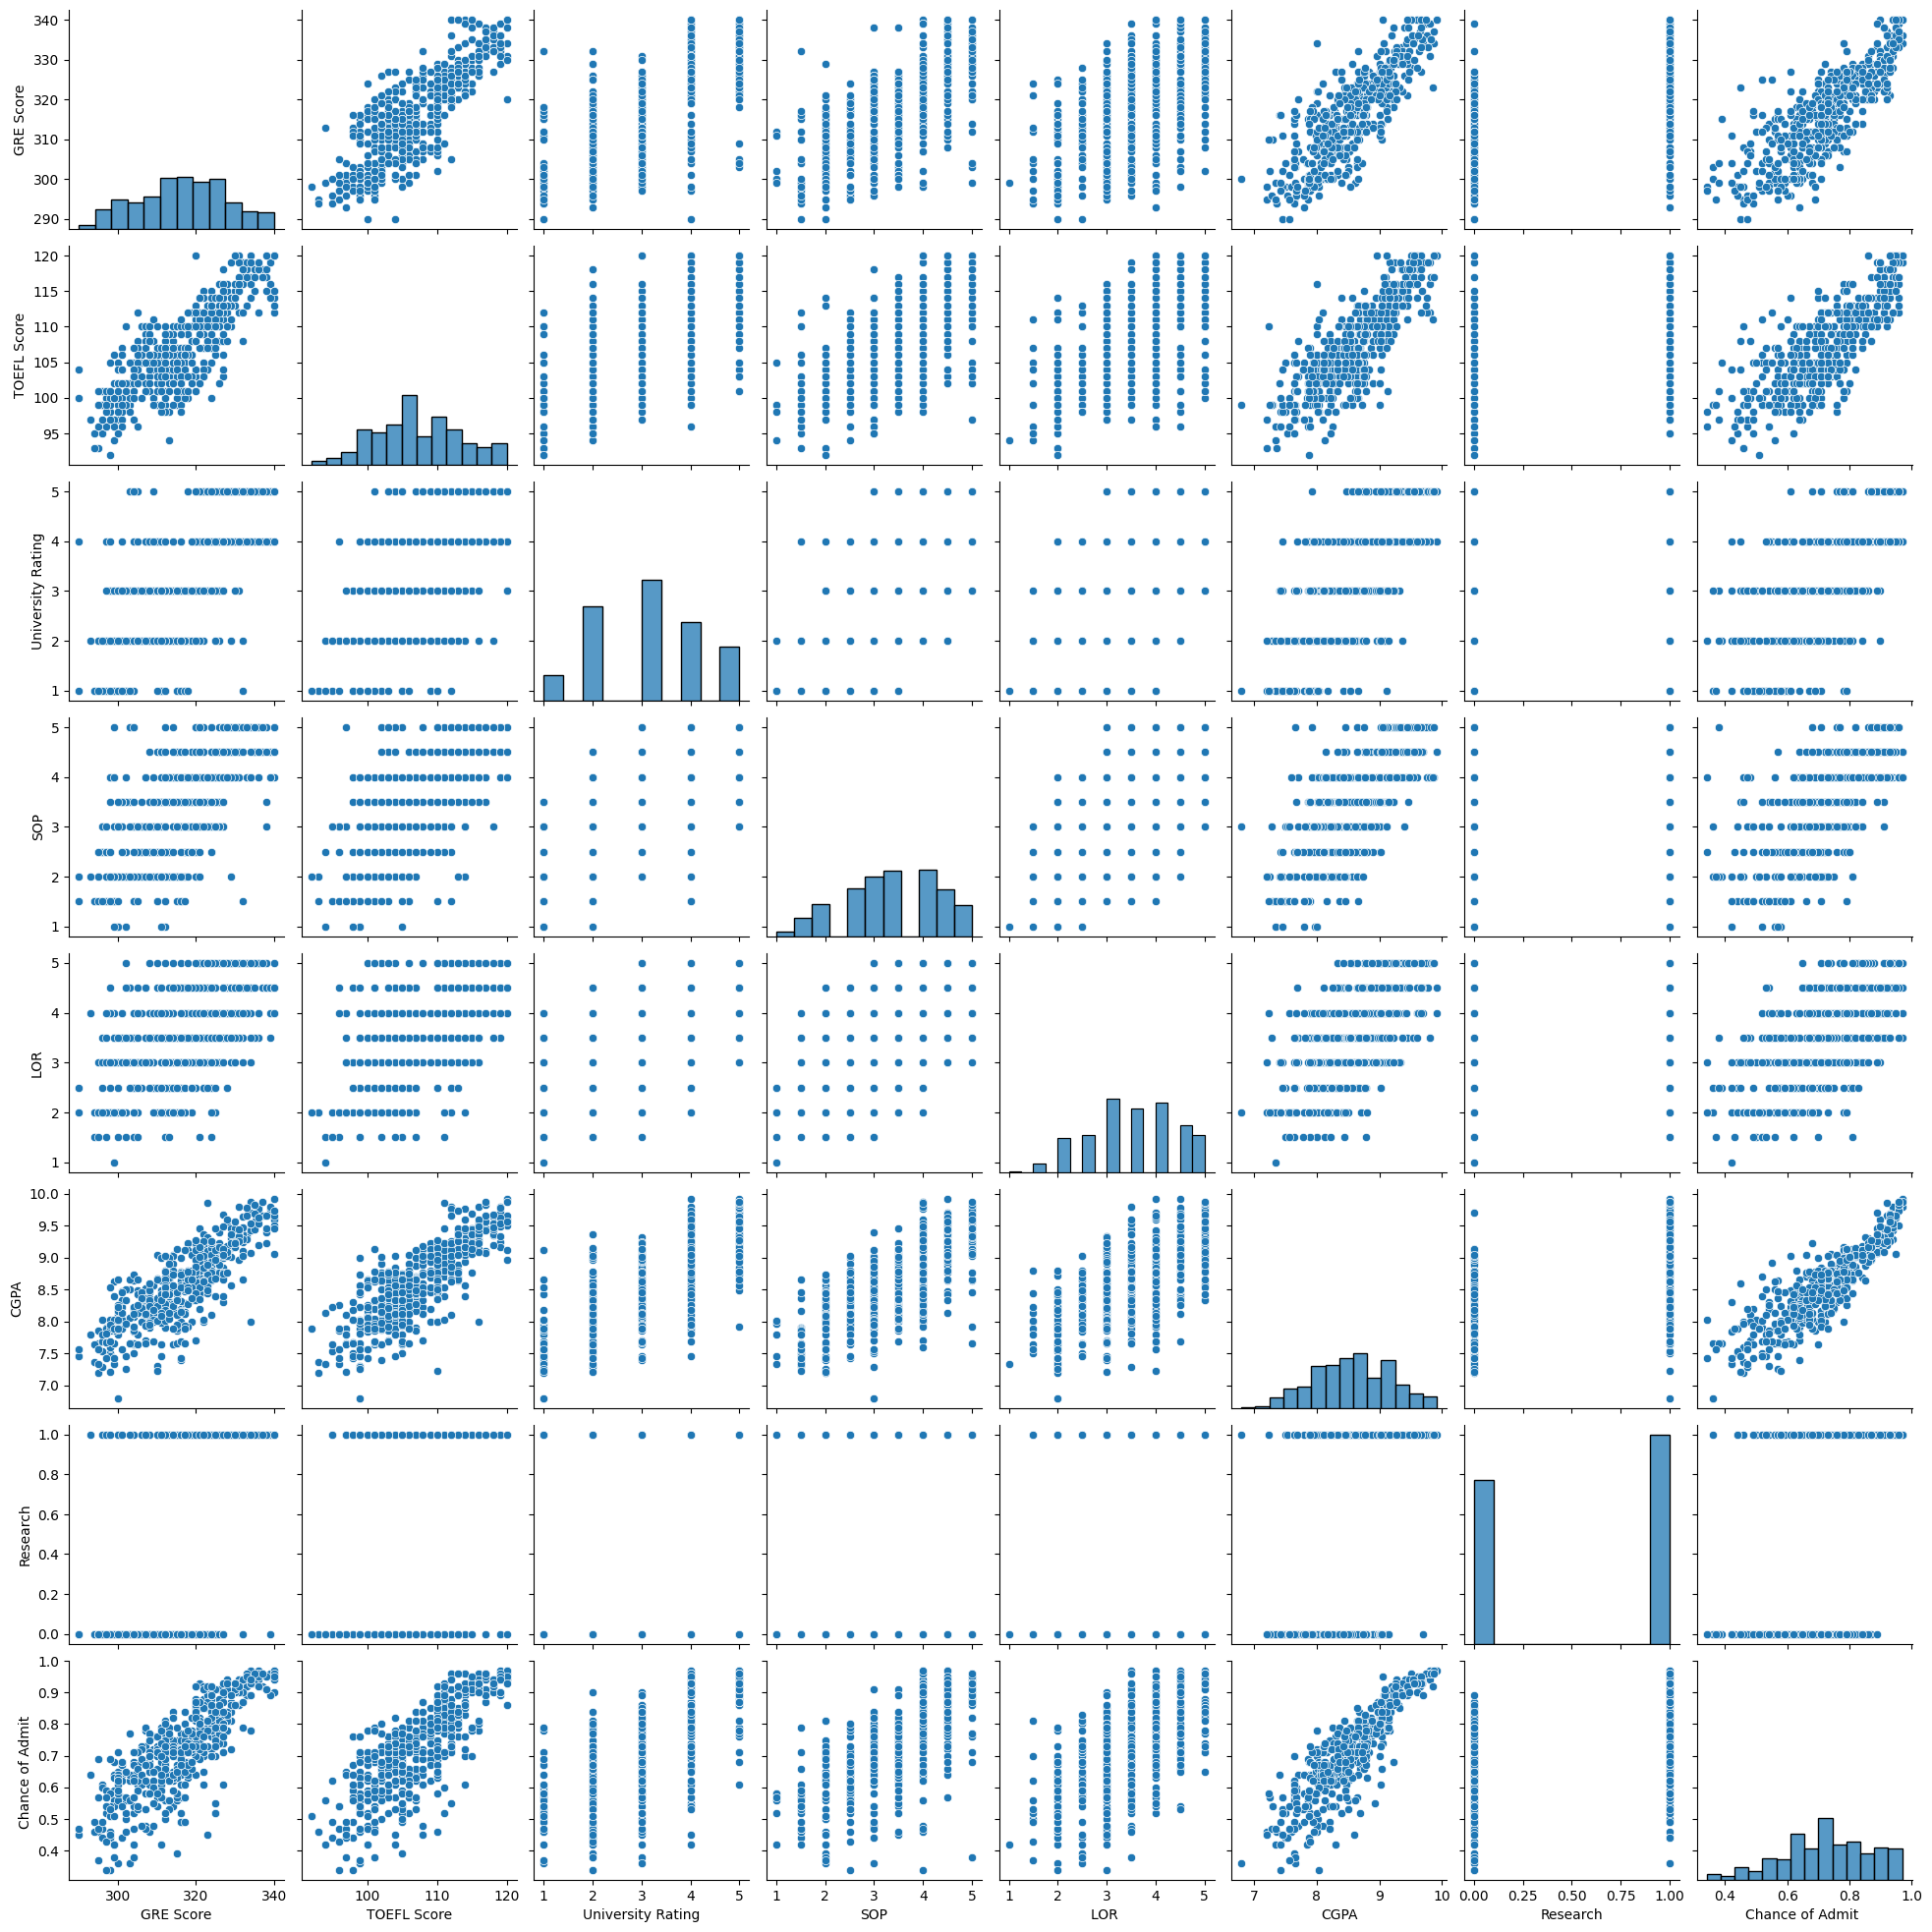

In [10]:
sns.pairplot(df)
plt.show()

* While university ranking, rating of SOP and LOR also have an impact on chances of admit, research is the only variable which doesn't have much of an impact
* We can see from the scatterplot that the values of university ranking, SOP, LOR and research are not continuous. We can convert these columns to categorical variables

In [11]:
df.rename(columns={'LOR ':'LOR', 'Chance of Admit ':'Chance of Admit'}, inplace=True)

In [12]:
df[['University Rating', 'SOP', 'LOR']] = df[['University Rating', 'SOP', 'LOR']].astype('category')
df['Research'] = df['Research'].astype('bool')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   GRE Score          500 non-null    int64   
 1   TOEFL Score        500 non-null    int64   
 2   University Rating  500 non-null    category
 3   SOP                500 non-null    category
 4   LOR                500 non-null    category
 5   CGPA               500 non-null    float64 
 6   Research           500 non-null    bool    
 7   Chance of Admit    500 non-null    float64 
dtypes: bool(1), category(3), float64(2), int64(2)
memory usage: 18.6 KB


In [13]:
df.describe()

,GRE Score,TOEFL Score,CGPA,Chance of Admit
count,500.000000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,8.576440,0.72174
std,11.295148,6.081868,0.604813,0.14114
min,290.000000,92.000000,6.800000,0.34000
25%,308.000000,103.000000,8.127500,0.63000
50%,317.000000,107.000000,8.560000,0.72000
75%,325.000000,112.000000,9.040000,0.82000
max,340.000000,120.000000,9.920000,0.97000


* Chances of admit is a probability measure , which is within 0 to 1 which is good (no outliers or missleading data in column).
* Range of GRE score looks like between 290 to 340.
* Range of TOEFL score is between 92 to 120.
* University rating , SOP and LOR are distributed between range of 1 to 5.
* CGPA range is between 6.8 to 9.92.
* Mean Research score is 0.56 while Median Research score is 1.0, this does not make sense since this is binary variable.

In [14]:
df.describe(include=['object','category'])

,University Rating,SOP,LOR
count,500,500.0,500.0
unique,5,9.0,9.0
top,3,4.0,3.0
freq,162,89.0,99.0


## Univariate Analysis

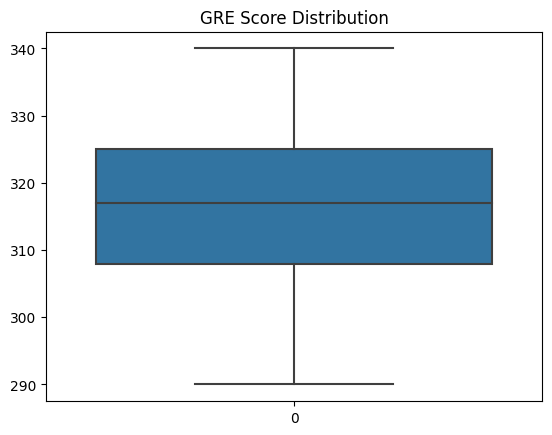

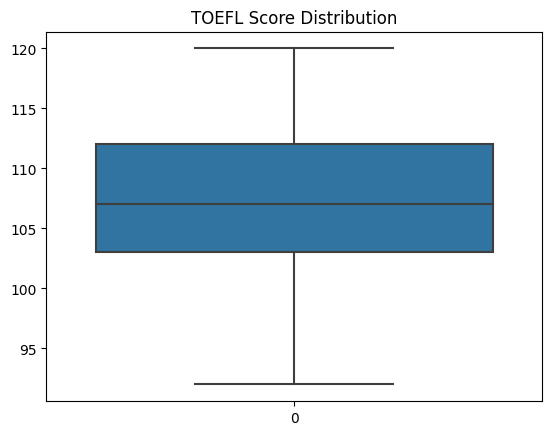

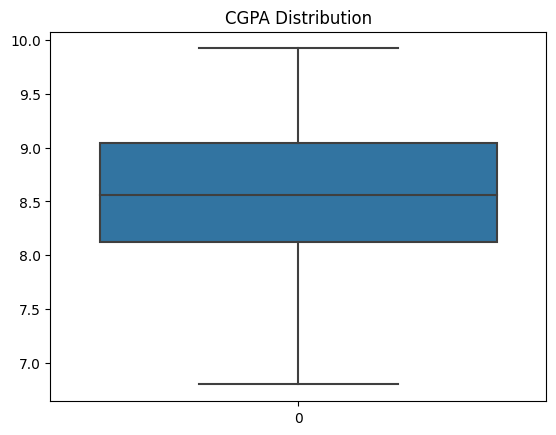

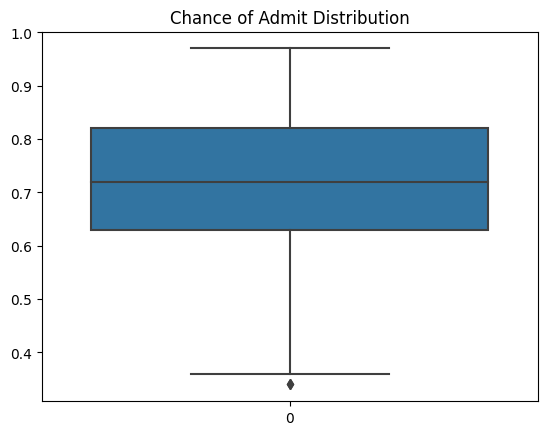

In [15]:
# GRE Score,TOEFL Score,CGPA and Chance of Admit using boxplot
num_col = ['GRE Score', 'TOEFL Score', 'CGPA','Chance of Admit']
for col in num_col:  
    sns.boxplot(df[col])
    plt.title(f'{col} Distribution')
    plt.show()

* Based on the above graph we donot have outliers for 'GRE Score', 'TOEFL Score' & 'CGPA'.

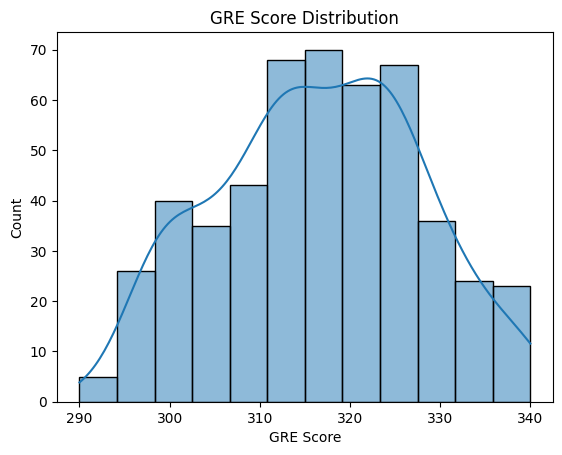

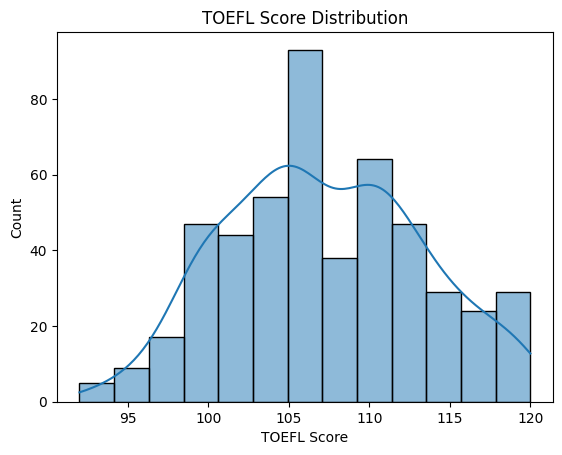

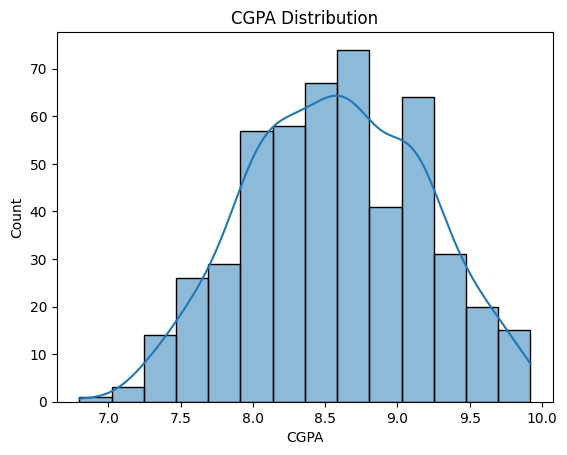

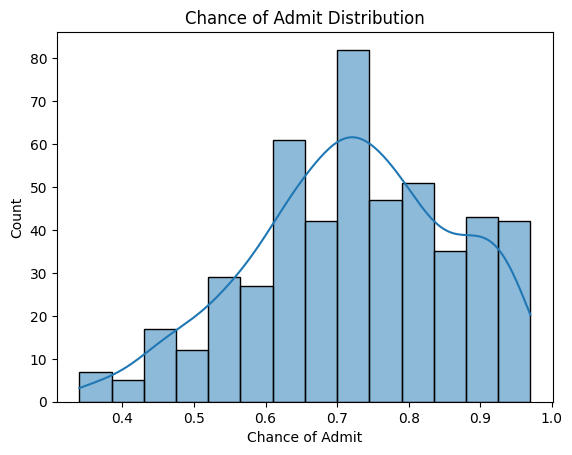

In [16]:
# GRE Score,TOEFL Score,CGPA and Chance of Admit using histplot
for col in num_col:  
    sns.histplot(df[col],kde = True)
    plt.title(f'{col} Distribution')
    plt.show()

* GRE scores are between 290 and 340, with maximum students scoring in the range 310-330
* TOEFL scores are between 90 and 120, with maximum students scoring around 105
* CGPA ranges between 7 and 10, with maximum students scoring around 8.5
* Chance of Admit is a probability percentage between 0 and 1, with maximum students scoring around 70%-75%

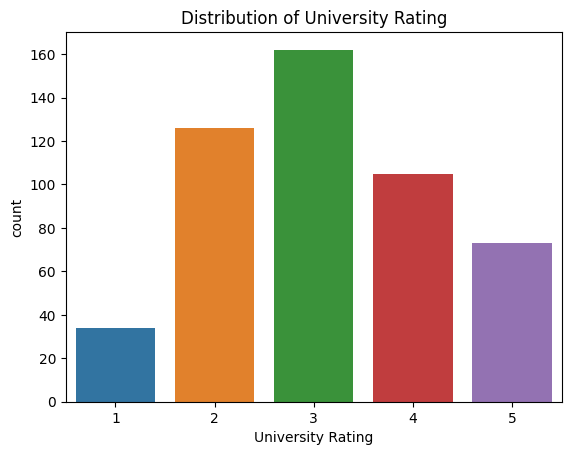

In [17]:
sns.countplot(data=df,x='University Rating')
plt.title(f'Distribution of University Rating')
plt.show()

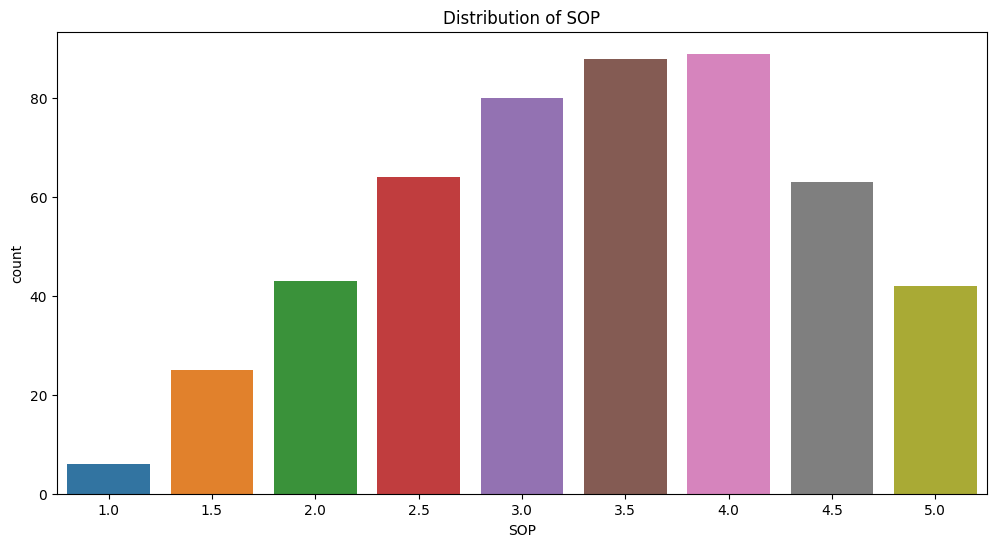

In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df,x='SOP')
plt.title(f'Distribution of SOP')
plt.show()

**OBSERVATION**:

* Most of the students have SOP between 3.5 - 4.

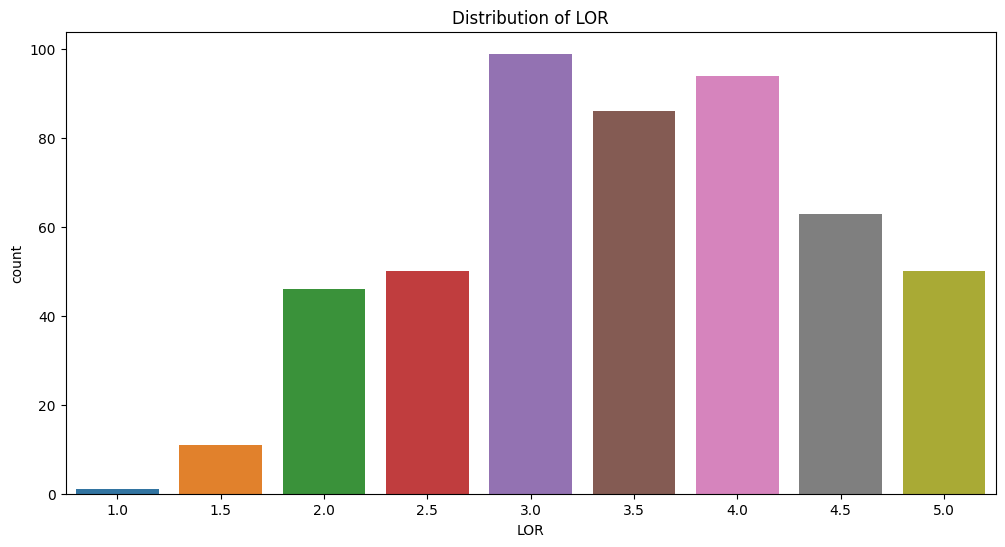

In [19]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df,x='LOR')
plt.title(f'Distribution of LOR')
plt.show()

**OBSERVATION**:

* Most of the students have LOR between 3 - 4.

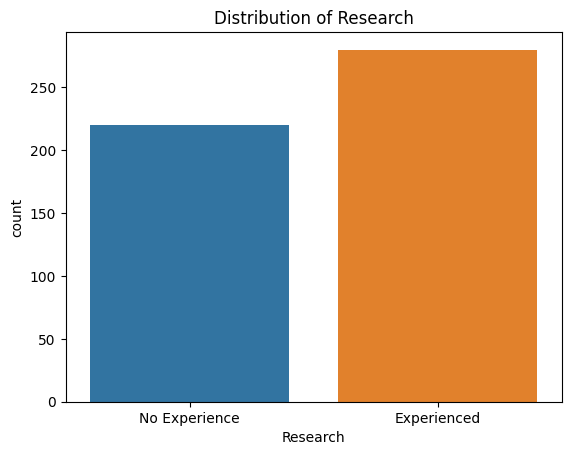

In [20]:
sns.countplot(data=df,x='Research')
plt.title(f'Distribution of Research')
plt.xticks([0, 1], ['No Experience', 'Experienced'])
plt.show()

In [21]:
Research = df['Research'].value_counts(normalize=True).map(lambda calc: round(100*calc,2)).reset_index()
Research.columns = ['Research', 'Count']
Research

,Research,Count
0,True,56.0
1,False,44.0


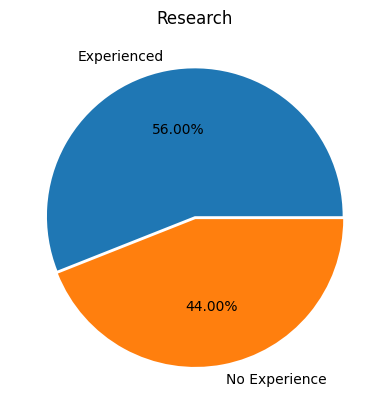

In [22]:
plt.pie(x = Research.Count, labels = ['Experienced', 'No Experience'], explode = [0,0.02],  autopct = '%.2f%%')
plt.title('Research')
plt.show()

**OBSERVATION:**

* 44% Of students had no experience in Research, while 56% of students do have experience in Research.

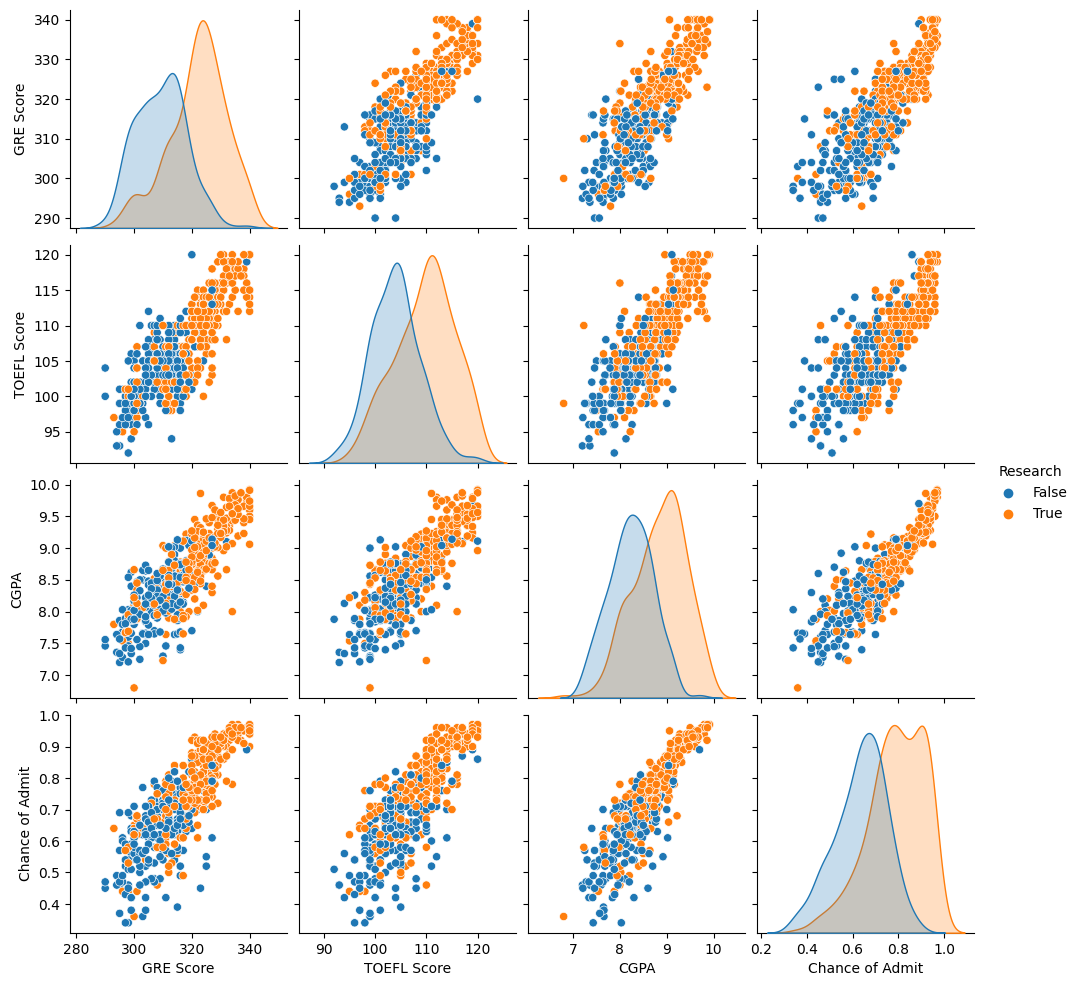

In [23]:
sns.pairplot(df,hue='Research')
plt.show()

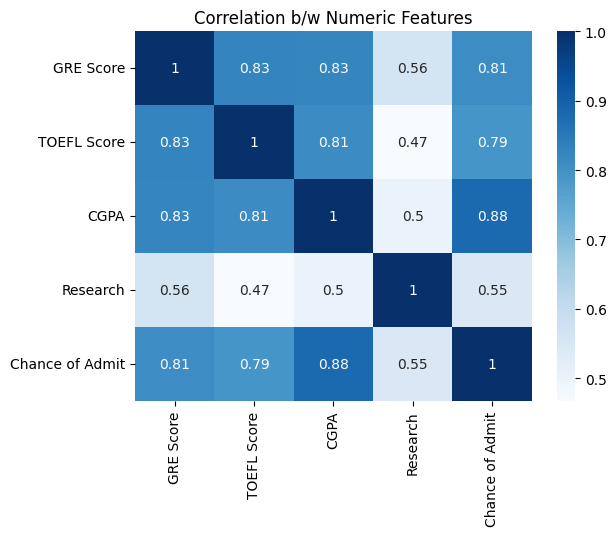

In [24]:
sns.heatmap(df.corr(), annot=True,cmap = "Blues")
plt.title('Correlation b/w Numeric Features')
plt.show()

* Confirming the inferences from pairplot, the correlation matrix also shows that exam scores (CGPA/GRE/TOEFL) have a strong positive correlation with chance of admit
* Infact, they are also highly correlated amongst themselves

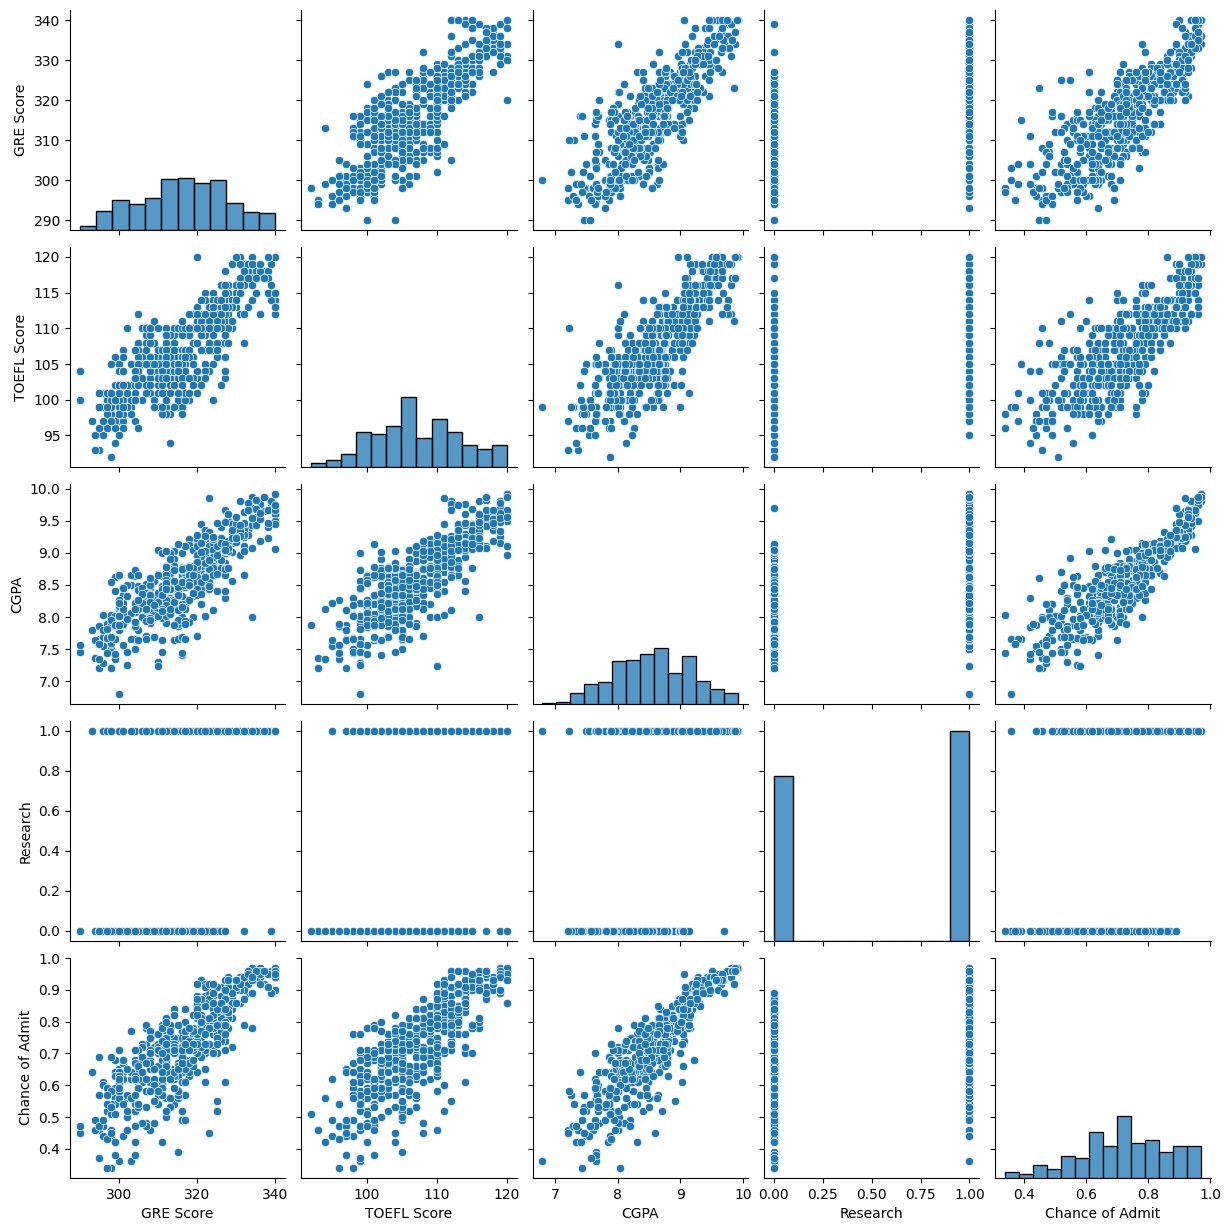

In [25]:
sns.pairplot(df)
plt.show()

* GRE, TOEFL and CGPA have a high positive correlation with chance of admit
* research is the only variable which doesn't have much of an impact.

## Bivariate Analysis
##### Categorical variables
1. 'Univarsity rating' vs 'Chance of Admit'
2. 'SOP' vs 'Chance of Admit'
3. 'LOR' vs 'Chance of Admit'
4. 'Research' vs 'Chance of Admit'

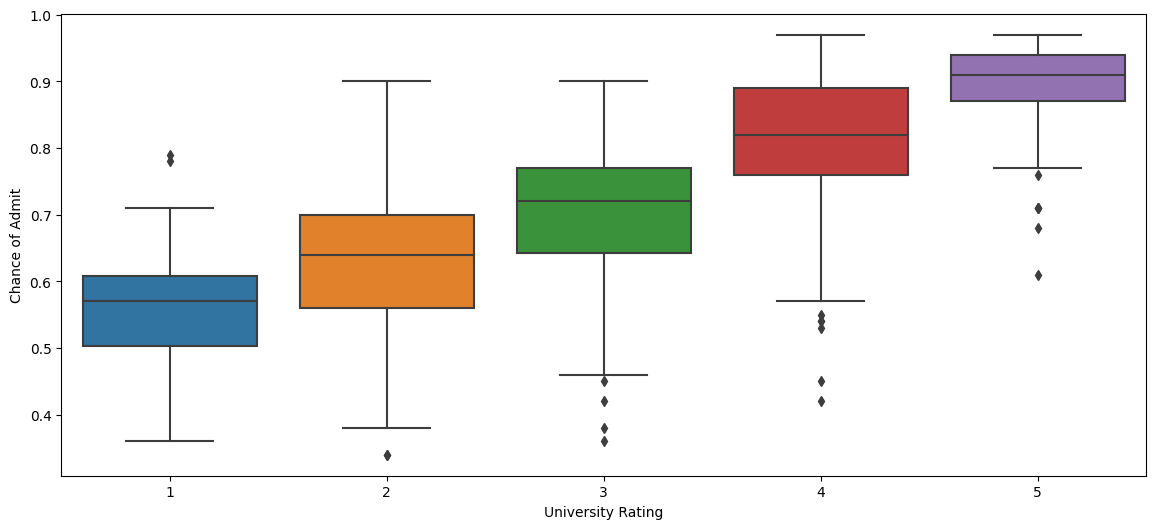

In [26]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='University Rating', y='Chance of Admit', data=df)
plt.show()

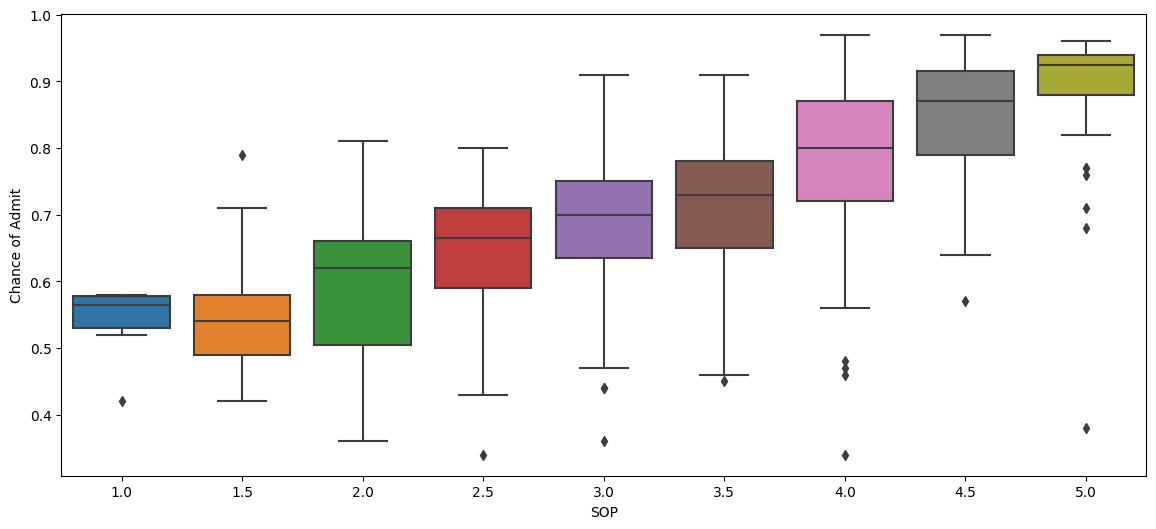

In [27]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='SOP', y='Chance of Admit', data=df)
plt.show()

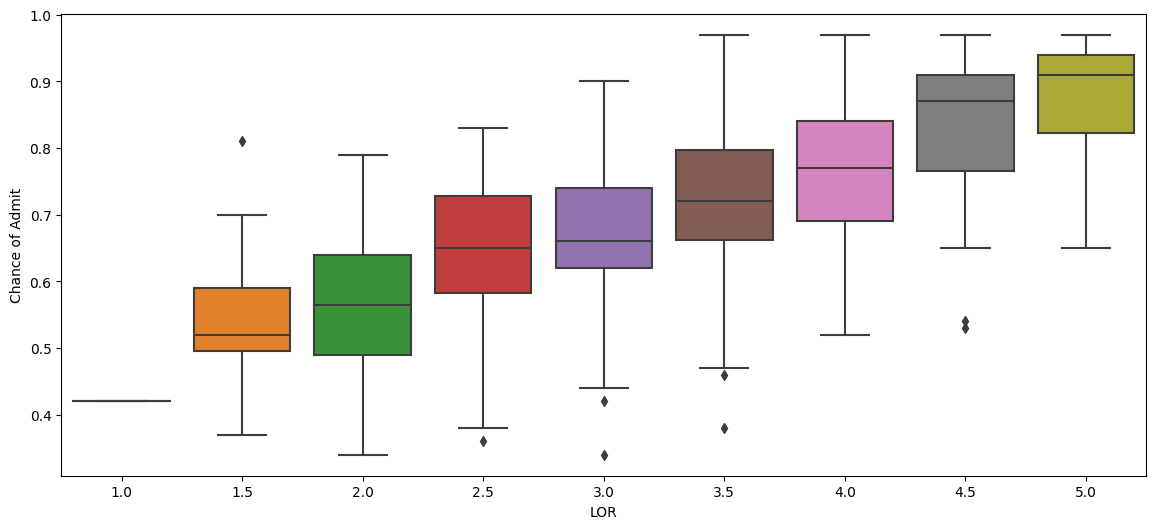

In [28]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='LOR', y='Chance of Admit', data=df)
plt.show()

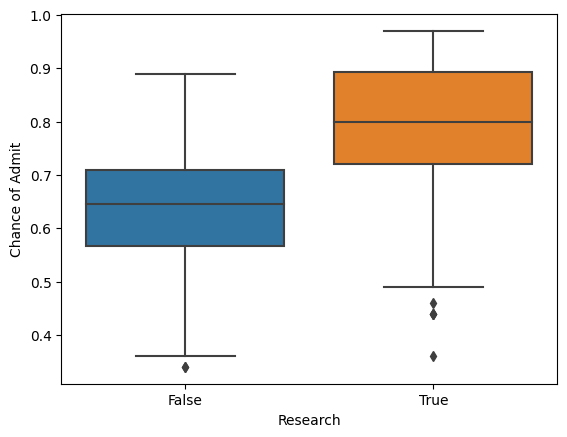

In [29]:
sns.boxplot(x='Research',y='Chance of Admit',data=df)
plt.show()

##### Numerical variables
1. 'GRE Score' vs 'Chance of Admit'
2. 'TOEFL Score' vs 'Chance of Admit'
3. 'CGPA' vs 'Chance of Admit'

<Figure size 1400x600 with 0 Axes>

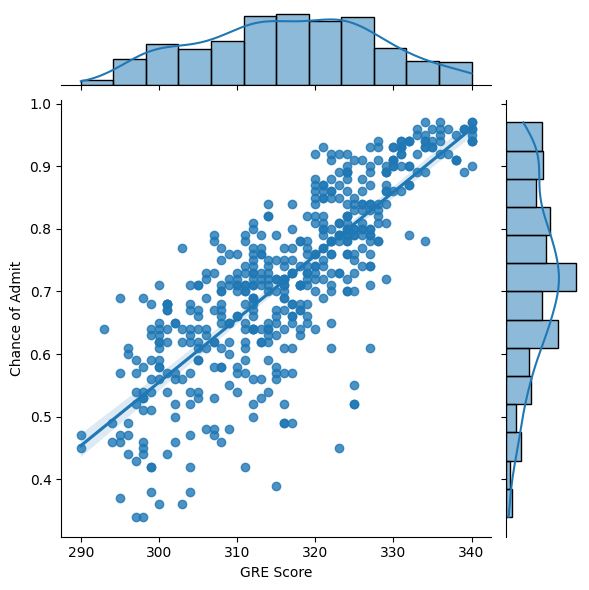

In [30]:
plt.figure(figsize=(14, 6))
sns.jointplot(x='GRE Score', y='Chance of Admit', data=df,kind = 'reg')
plt.show()

* Higher GRE scores are positively correlated with increased chance of admit, indicating a linear relationship between the two factors and variance is high.

<Figure size 1400x600 with 0 Axes>

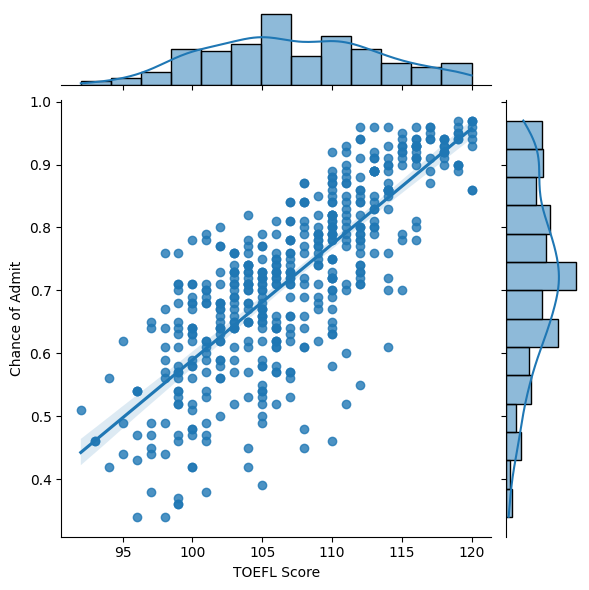

In [31]:
plt.figure(figsize=(14, 6))
sns.jointplot(x='TOEFL Score', y='Chance of Admit', data=df,kind = 'reg')
plt.show()

* The TOEFL Score increases, the Chance of Admit also increases as we can see, they have a linear relationship.
* Variance is low

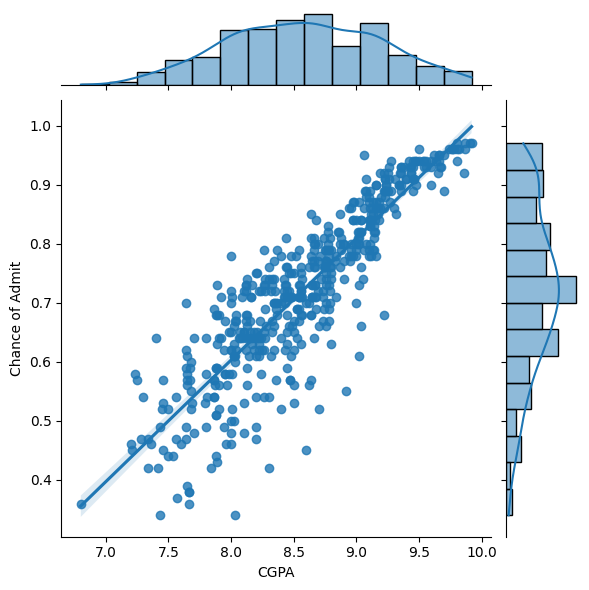

In [32]:
sns.jointplot(x='CGPA', y='Chance of Admit', data=df,kind = 'reg')
plt.show()

* The CGPA increases, the Chance of getting Admission also increases.

## MultiVariate Analysis

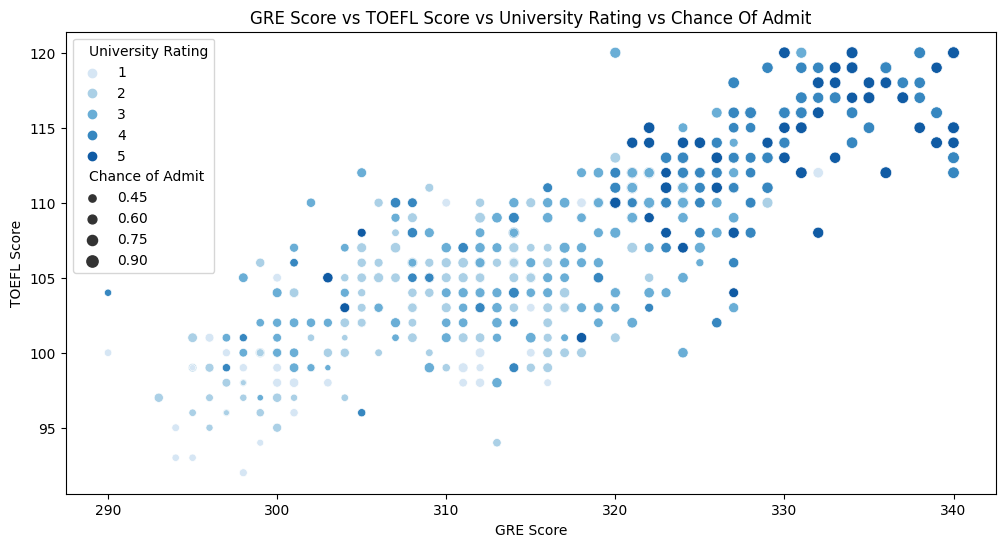

In [33]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='GRE Score',y='TOEFL Score',hue='University Rating',size='Chance of Admit',data=df,palette='Blues')
plt.title('GRE Score vs TOEFL Score vs University Rating vs Chance Of Admit')
plt.show()

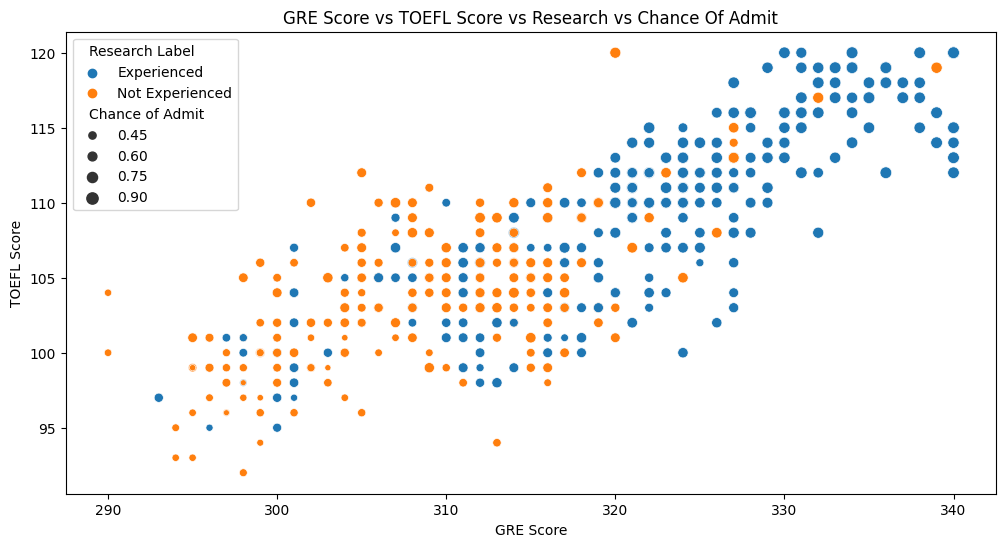

In [34]:
plt.figure(figsize=(12, 6))

research_labels = {True: 'Experienced', False: 'Not Experienced'}
df['Research Label'] = df['Research'].replace(research_labels)

sns.scatterplot(x='GRE Score', y='TOEFL Score', hue='Research Label', size='Chance of Admit', data=df,)

plt.xlabel('GRE Score')
plt.ylabel('TOEFL Score')
plt.title('GRE Score vs TOEFL Score vs Research vs Chance Of Admit')

plt.show()

## Linear Regression

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error, adjusted_mutual_info_score
from sklearn.feature_selection import f_regression

In [36]:
num_col.remove('Chance of Admit')

In [37]:
# Separate predictor and target variables
cat_cols = ['University Rating', 'SOP', 'LOR','Research']
x = df[num_col + cat_cols]
y = df[['Chance of Admit']]

In [38]:
x.head()

,GRE Score,TOEFL Score,CGPA,University Rating,SOP,LOR,Research
0,337,118,9.65,4,4.5,4.5,True
1,324,107,8.87,4,4.0,4.5,True
2,316,104,8.00,3,3.0,3.5,True
3,322,110,8.67,3,3.5,2.5,True
4,314,103,8.21,2,2.0,3.0,False


In [39]:
y.head()

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65


In [40]:
# Split the data into training and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)
print(f'Shape of x_train: {x_train.shape}')
print(f'Shape of x_test: {x_test.shape}')

Shape of x_train: (400, 7)
Shape of x_test: (100, 7)


In [41]:
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of y_train: (400, 1)
Shape of y_test: (100, 1)


In [42]:
#Initialising object of class MinMaxScaler() for Standardisation
scaler_x = MinMaxScaler()

In [43]:
x_cat_encoded = pd.concat([x_train, x_test])
x_cat_encoded.head(10)

,GRE Score,TOEFL Score,CGPA,University Rating,SOP,LOR,Research
249,321,111,8.83,3,3.5,4.0,True
433,316,111,8.54,4,4.0,5.0,False
19,303,102,8.50,3,3.5,3.0,False
322,314,107,8.27,2,2.5,4.0,False
332,308,106,8.21,3,3.5,2.5,True
56,316,102,7.40,3,2.0,3.0,False
301,319,108,8.76,2,2.5,3.0,False
229,324,111,9.01,4,3.0,3.0,True
331,311,105,8.12,2,3.0,2.0,True
132,309,105,8.56,5,3.5,3.5,False


In [44]:
#Fitting scaler_x to the training data
scaler_x.fit(x_cat_encoded)

MinMaxScaler()

In [45]:
all_cols = x_train.columns
#Transforming numeric columns of x_train and x_test
x_train[all_cols]=scaler_x.transform(x_train[all_cols])
x_test[all_cols]=scaler_x.transform(x_test[all_cols])

In [46]:
x_test.head()

,GRE Score,TOEFL Score,CGPA,University Rating,SOP,LOR,Research
361,0.88,0.857143,0.878205,0.75,0.750,0.625,1.0
73,0.48,0.571429,0.717949,0.75,0.875,0.750,1.0
374,0.50,0.464286,0.272436,0.25,0.250,0.375,0.0
155,0.44,0.607143,0.605769,0.50,0.500,0.500,0.0
104,0.72,0.714286,0.721154,0.50,0.625,0.500,1.0


In [47]:
#Initialising object of Class LinearRegression()
lr_Test = LinearRegression()    # training LinearRegression model 
lr_Test.fit(x_train,y_train)

LinearRegression()

In [48]:
#r2 score on train data
r2_score(y_train,lr_Test.predict(x_train))

0.8210671369321554

In [49]:
#r2 score on test data
r2_score(y_test,lr_Test.predict(x_test))

0.8188432567829629

In [50]:
def AdjustedR2score(R2,n,d):
    return 1-(((1-R2)*(n-1))/(n-d-1))

In [51]:
y_pred = lr_Test.predict(x_test)
print("MSE:",mean_squared_error(y_test,y_pred)) #MSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred))) #RMSE
print("MAE :",mean_absolute_error(y_test,y_pred) ) #MAE
print("r2_score:",r2_score(y_test,y_pred)) #r2score
print("Adjusted R2 score :", AdjustedR2score(r2_score(y_test,y_pred),len(x),x.shape[1]))  #adjusted R2 score

MSE: 0.0037046553987884106
RMSE: 0.060865880415783113
MAE : 0.04272265427705366
r2_score: 0.8188432567829629
Adjusted R2 score : 0.816265823444509


* The similarity in training and test data loss scores indicates an absence of model overfitting.
 1. A Mean Absolute Error at 0.04 points to an average deviation of 4% between actual and predicted chance of admit values.
2. A Root Mean Square Error registered at 0.06 indicates an average root squared deviation of 6% between predicted and actual values.
3. The R2 Score of 0.82 signifies the model's capacity to encompass 82% of the data's variability.
4. Adjusted R2, an extension of R2, portrays how the alteration in feature count impacts predictive accuracy.

## Multicolillinearity check using VIF score

In [52]:
scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(x_train)
vif = pd.DataFrame()
X_t = pd.DataFrame(X_tr_scaled, columns=x_train.columns)
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,CGPA,4.65
0,GRE Score,4.49
1,TOEFL Score,3.66
4,SOP,2.79
3,University Rating,2.57
5,LOR,1.98
6,Research,1.52


* With all VIF scores below 5, there's little indication of pronounced multicollinearity issues.

## Residual analysis

In [53]:
y_predicted = lr_Test.predict(x_test)
y_predicted.shape

(100, 1)

In [54]:
#Mean of Residuals
residuals = y_test.values - y_predicted
print('Mean of Residuals: ', residuals.mean())

Mean of Residuals:  -0.005453623717661331


* Since the mean of residuals is very close to 0, we can say that the model is unbiased

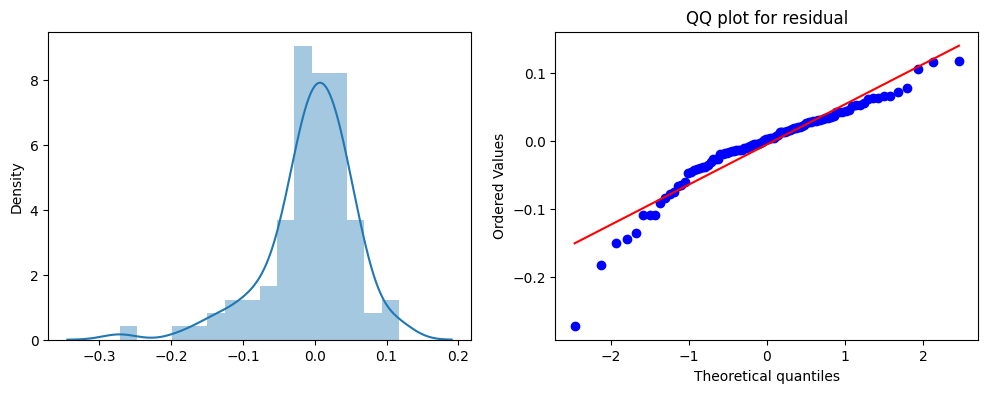

In [55]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(residuals)
plt.subplot(1,2,2)
stats.probplot(residuals.reshape(-1,), plot = plt)
plt.title('QQ plot for residual')
plt.show()

## Test of homoscedasticity

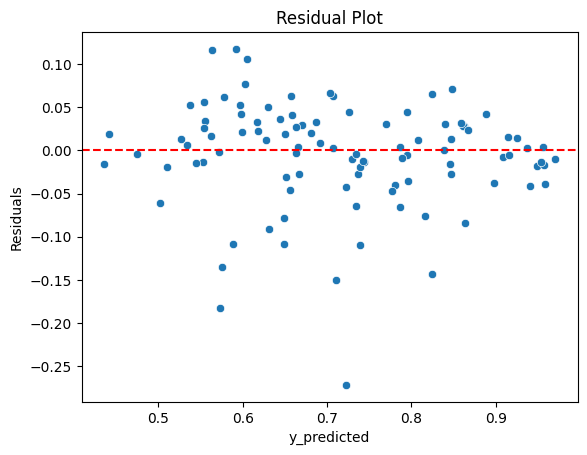

In [56]:
# Test of homoscedasticity and plotting y_predicted and residuals
sns.scatterplot(x = y_predicted.reshape((-1,)), y=residuals.reshape((-1,)))
plt.title('Residual Plot')
plt.xlabel('y_predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show();

* Since the residual plot shows no clear pattern or trend in residuals, we can conclude that linearity of variables exists.

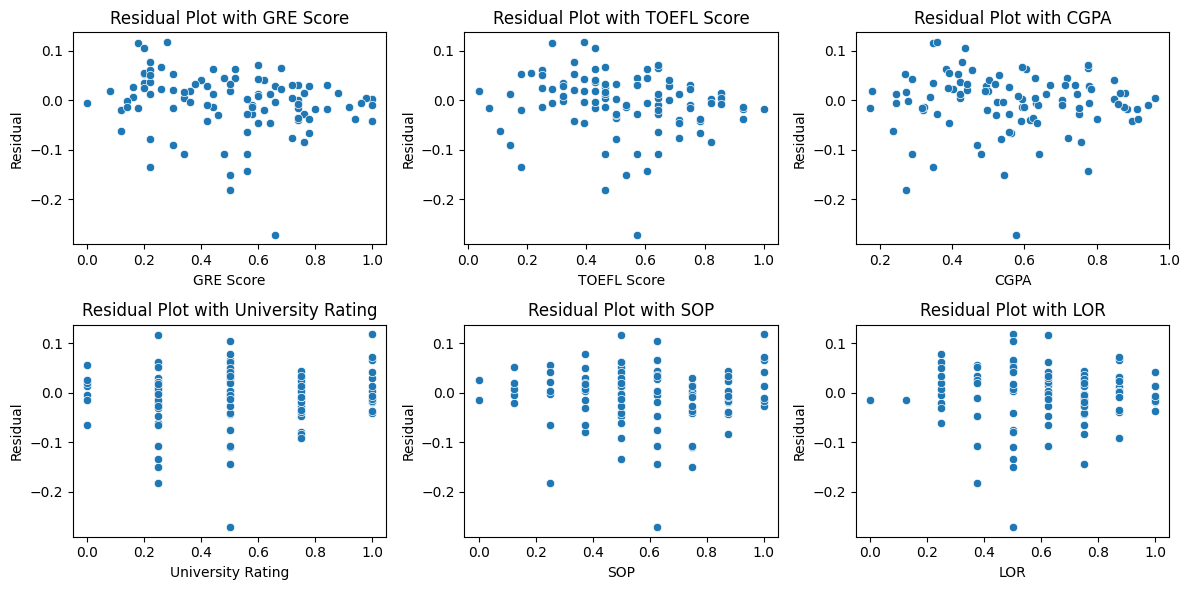

In [57]:
# Scatterplot of residuals with each independent variable to check for Homoscedasticity
plt.figure(figsize=(12,6))
i=1
for col in x_test.columns[:-1]:
  ax = plt.subplot(2,3,i)
  sns.scatterplot(x=x_test[col].values.reshape((-1,)), y=residuals.reshape((-1,)))
  plt.title(f'Residual Plot with {col}')
  plt.xlabel(col)
  plt.ylabel('Residual')
  i+=1

plt.tight_layout()
plt.show();

* Since we do not see any significant change in the spread of residuals with respect to change in independent variables, we can conclude that homoscedasticity is met.

## Model Regularisation

In [58]:
from sklearn.linear_model import Ridge  # L2 regualrization
from sklearn.linear_model import Lasso  # L1 regualrization 
from sklearn.linear_model import ElasticNet

Ridge and Lasso regression are both regularization techniques used to prevent overfitting in linear regression models. They work by adding a penalty term to the cost function, which helps to control the complexity of the model by shrinking the coefficient values.

## Ridge Regression(L2 regularization)

In [59]:
#Initialising instance of Ridge classes
model_ridge = Ridge()
# Fitting the models to training data
model_ridge.fit(x_train, y_train)

Ridge()

In [60]:
# Predicting values for train and test data
y_train_ridge = model_ridge.predict(x_train)
y_test_ridge = model_ridge.predict(x_test)

In [61]:
y_pred = model_ridge.predict(x_test)
print("MSE:",mean_squared_error(y_test,y_pred)) # MSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred))) #RMSE
print("MAE :",mean_absolute_error(y_test,y_pred) ) # MAE
print("r2_score:",r2_score(y_test,y_pred)) # r2score
print("Adjusted R2 score :", AdjustedR2score(r2_score(y_test,y_pred),len(x),x.shape[1]))  # adjusted R2 score

MSE: 0.0037591425219283543
RMSE: 0.06131184650561712
MAE : 0.04335003429327535
r2_score: 0.8161788497834546
Adjusted R2 score : 0.813563508215333


In [62]:
y_predicted = model_ridge.predict(x_train)
y_predicted.shape

(400, 1)

In [63]:
#Mean of Residuals
residuals = y_train.values - y_predicted
print('Mean of Residuals: ', residuals.mean())

Mean of Residuals:  8.743006318923108e-17


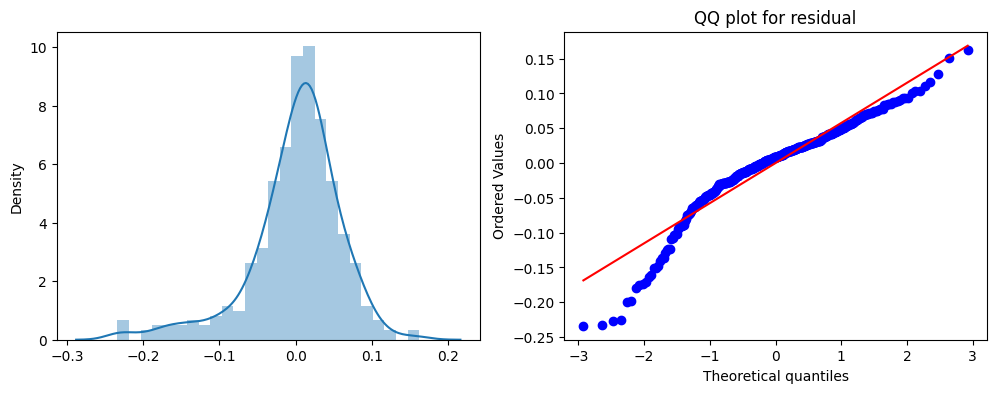

In [64]:
residuals = y_train.values - y_predicted
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(residuals)
plt.subplot(1,2,2)
stats.probplot(residuals.reshape(-1,), plot = plt)
plt.title('QQ plot for residual')
plt.show()

## Lasso Regression(L1 regularization)

In [65]:
#Initialising instance of Lasso classes
model_lasso = Lasso()
# Fitting the models to training data
model_lasso.fit(x_train, y_train)

Lasso()

In [66]:
# Predicting values for train and test data
y_train_lasso = model_lasso.predict(x_train)
y_test_lasso = model_lasso.predict(x_test)

In [67]:
y_pred = model_lasso.predict(x_test)
print("MSE:",mean_squared_error(y_test,y_pred)) # MSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred))) #RMSE
print("MAE :",mean_absolute_error(y_test,y_pred) ) # MAE
print("r2_score:",r2_score(y_test,y_pred)) # r2score
print("Adjusted R2 score :", AdjustedR2score(r2_score(y_test,y_pred),len(x),x.shape[1]))  # adjusted R2 score

MSE: 0.020598230624999995
RMSE: 0.1435208369018241
MAE : 0.116268
r2_score: -0.00724844132029312
Adjusted R2 score : -0.021579211826882716


In [68]:
y_predicted = model_lasso.predict(x_train)
y_predicted.shape

(400,)

In [69]:
#Mean of Residuals
residuals = y_train.values - y_predicted
print('Mean of Residuals: ', residuals.mean())

Mean of Residuals:  1.014299755297543e-16


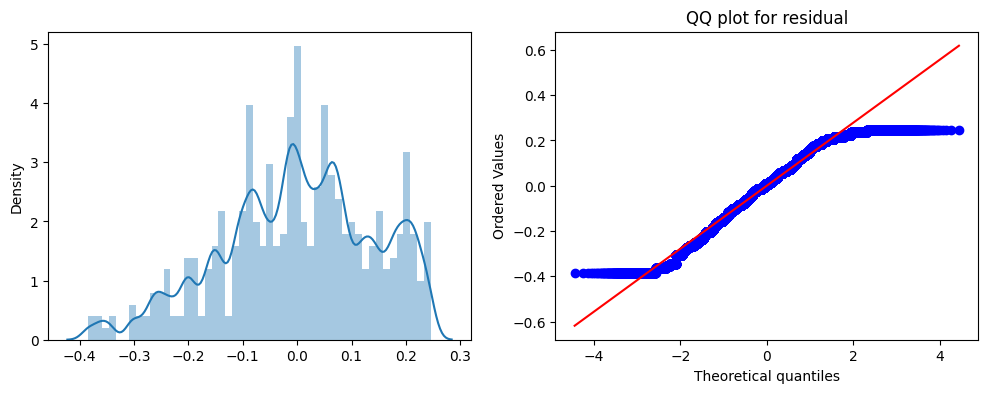

In [70]:
residuals = y_train.values - y_predicted
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(residuals)
plt.subplot(1,2,2)
stats.probplot(residuals.reshape(-1,), plot = plt)
plt.title('QQ plot for residual')
plt.show()


### L1 and L2 regularisation(ElasticNet)

In [71]:
#Initialising instance of ElasticNet classes
model_ElasticNet = ElasticNet()
# Fitting the models to training data
model_ElasticNet.fit(x_train , y_train)

ElasticNet()

In [72]:
# Predicting values for train and test data
y_train_ElasticNet = model_ElasticNet.predict(x_train)
y_test_ElasticNet = model_ElasticNet.predict(x_test)

In [73]:
y_pred = model_ElasticNet.predict(x_test)
print("MSE:",mean_squared_error(y_test,y_pred)) # MSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred))) #RMSE
print("MAE :",mean_absolute_error(y_test,y_pred) ) # MAE
print("r2_score:",r2_score(y_test,y_pred)) # r2score
print("Adjusted R2 score :", AdjustedR2score(r2_score(y_test,y_pred),len(x),x.shape[1]))  # adjusted R2 score

MSE: 0.020598230624999995
RMSE: 0.1435208369018241
MAE : 0.116268
r2_score: -0.00724844132029312
Adjusted R2 score : -0.021579211826882716


### Identifying Best Model

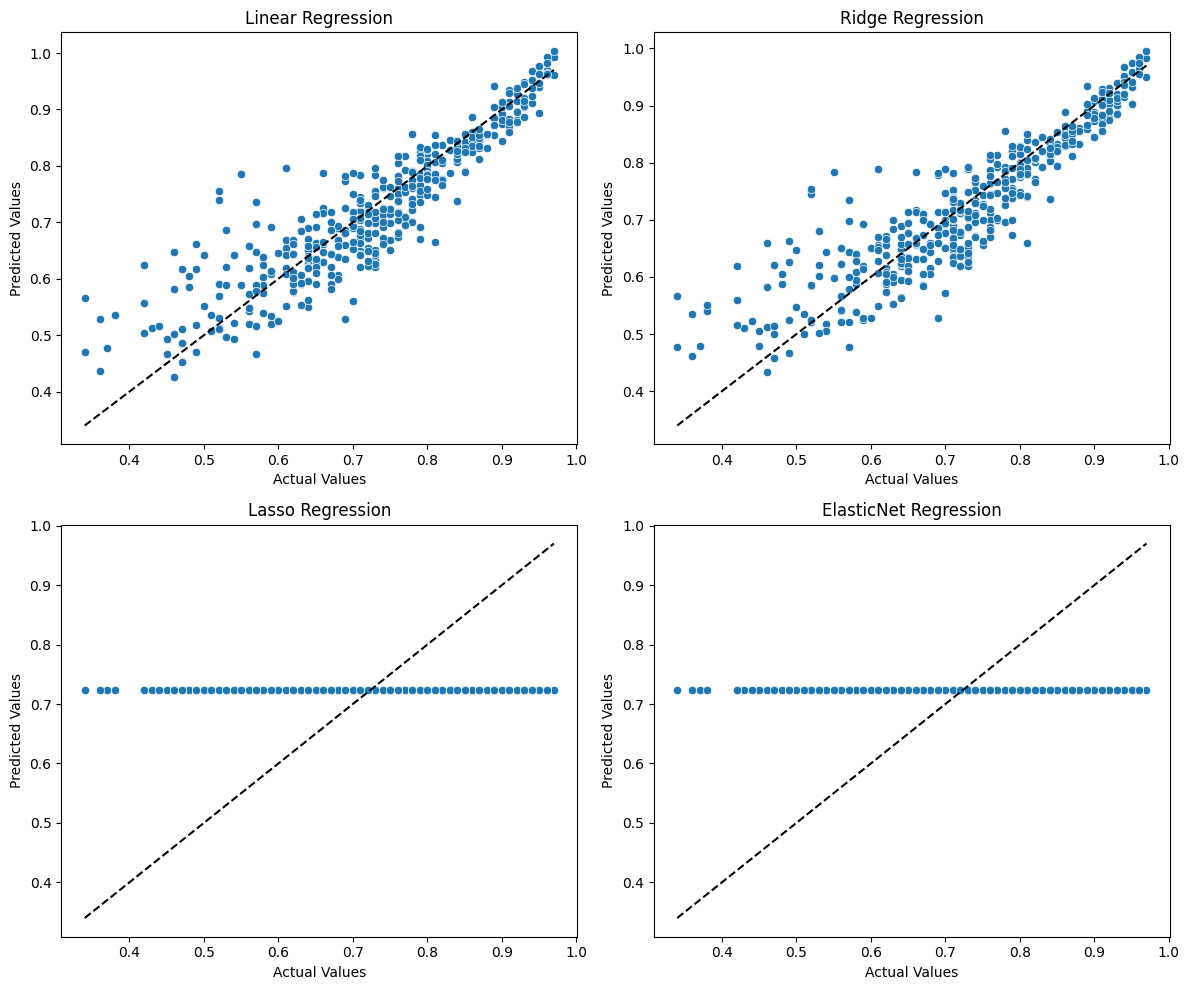

In [74]:
# Actual v/s Predicted values for training data
y_pred_train = lr_Test.predict(x_train)

actual_values = y_train.values.reshape((-1,))
predicted_values = [y_pred_train.reshape((-1,)), y_train_ridge.reshape((-1,)), y_train_lasso.reshape((-1,)), y_train_ElasticNet.reshape((-1,))]
model = ['Linear Regression', 'Ridge Regression', 'Lasso Regression','ElasticNet Regression']

plt.figure(figsize=(12,10))
i=1
for preds in predicted_values:
  ax = plt.subplot(2,2,i)
  sns.scatterplot(x=actual_values, y=preds)
  plt.plot([min(actual_values),max(actual_values)], [min(actual_values),max(actual_values)], 'k--')
  plt.xlabel('Actual Values')
  plt.ylabel('Predicted Values')
  plt.title(model[i-1])
  i+=1

plt.tight_layout()
plt.show()

* While Linear Regression and Ridge regression have similar scores, Lasso regression and ElasticNet Regression has not performed well on both training and test data.

In [75]:
y_pred = model_ElasticNet.predict(x_test)
ElasticNet_model_metrics = []
ElasticNet_model_metrics.append(mean_squared_error(y_test,y_pred)) # MSE
ElasticNet_model_metrics.append(np.sqrt(mean_squared_error(y_test,y_pred))) #RMSE
ElasticNet_model_metrics.append(mean_absolute_error(y_test,y_pred) ) # MAE
ElasticNet_model_metrics.append(r2_score(y_test,y_pred)) # r2score
ElasticNet_model_metrics.append(AdjustedR2score(r2_score(y_test,y_pred),len(x),x.shape[1]))  # adjusted R2 score


y_pred = lr_Test.predict(x_test)
LinearRegression_model_metrics = []
LinearRegression_model_metrics.append(mean_squared_error(y_test,y_pred)) # MSE
LinearRegression_model_metrics.append(np.sqrt(mean_squared_error(y_test,y_pred))) #RMSE
LinearRegression_model_metrics.append(mean_absolute_error(y_test,y_pred) ) # MAE
LinearRegression_model_metrics.append(r2_score(y_test,y_pred)) # r2score
LinearRegression_model_metrics.append(AdjustedR2score(r2_score(y_test,y_pred),len(x),x.shape[1]))  # adjusted R2 score


y_pred = model_ridge.predict(x_test)
RidgeModel_model_metrics = []
RidgeModel_model_metrics.append(mean_squared_error(y_test,y_pred)) # MSE
RidgeModel_model_metrics.append(np.sqrt(mean_squared_error(y_test,y_pred))) #RMSE
RidgeModel_model_metrics.append(mean_absolute_error(y_test,y_pred) ) # MAE
RidgeModel_model_metrics.append(r2_score(y_test,y_pred)) # r2score
RidgeModel_model_metrics.append(AdjustedR2score(r2_score(y_test,y_pred),len(x),x.shape[1]))  # adjusted R2 score


y_pred = model_lasso.predict(x_test)
LassoModel_model_metrics = []
LassoModel_model_metrics.append(mean_squared_error(y_test,y_pred)) # MSE
LassoModel_model_metrics.append(np.sqrt(mean_squared_error(y_test,y_pred))) #RMSE
LassoModel_model_metrics.append(mean_absolute_error(y_test,y_pred) ) # MAE
LassoModel_model_metrics.append(r2_score(y_test,y_pred)) # r2score
LassoModel_model_metrics.append(AdjustedR2score(r2_score(y_test,y_pred),len(x),x.shape[1]))  # adjusted R2 score

In [76]:
A = pd.DataFrame([LinearRegression_model_metrics,LassoModel_model_metrics,RidgeModel_model_metrics,ElasticNet_model_metrics],columns=["MSE","RMSE","MAE","R2_SCORE","ADJUSTED_R2"],index = ["Linear Regression Model","Lasso Regression Model","Ridge Regression Model","ElasticNet Regression Model"])
A

,MSE,RMSE,MAE,R2_SCORE,ADJUSTED_R2
Linear Regression Model,0.003705,0.060866,0.042723,0.818843,0.816266
Lasso Regression Model,0.020598,0.143521,0.116268,-0.007248,-0.021579
Ridge Regression Model,0.003759,0.061312,0.043350,0.816179,0.813564
ElasticNet Regression Model,0.020598,0.143521,0.116268,-0.007248,-0.021579


## Observations:
* The chance of admit distribution skews left for the target variable.
* Exam scores (CGPA/GRE/TOEFL) exhibit a robust positive correlation with the chance of admit, and these variables showcase significant mutual correlation.
* Categorical variables like university ranking, research, SOP/LOR quality display an upward trend concerning chances of admit.
* fist column was observed as unique row identifier which was dropped and was not required for model building.
* No null values were present in data.
* No Significant amount of outliers were found in data.
* Chance of admission(target variable) and GRE score(an independent feature) are nearly normally distributed.
* Independent Variables (Input data): GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, Research
* Target/Dependent Variable : Chance of Admission (the value we want to predict)
* from correlation heatmap , we can observe GRE score, TOEFL score and CGPA have very high correlation with Change of admission.
* University rating, SOP ,LOR and Research have comparatively slightly less correlated than other features.
* chances of admit is a probability measure , which is within 0 to 1 which is good (no outliers or misleading data in column).
* Range of GRE score looks like between 290 to 340.
* Range of TOEFL score is between 92 to 120.
* university rating , SOP and LOR are distributed between range of 1 to 5.
* CGPA range is between 6.8 to 9.92.
* From boxplots (distribution of chance of admission (probability of getting admission) as per GRE score ) : with higher GRE score , there is high probability of getting an admission .
* Both Linear Regression and Ridge Regression models, the optimal choices, capture up to 82% variance in the chance of admit. Yet, achieving superior outcomes becomes challenging due to high predictor variable collinearity.
* Aside from multicollinearity, predictor variables fulfil Linear Regression prerequisites: residuals' mean approximates zero, variable linearity, residual normality, and established homoscedasticity.

## Actionable Insights & Recommendations:
* Considering the strong correlation among exam scores, augmenting the model with additional independent features is advisable for enhanced predictive accuracy.
* Awareness of CGPA and Research Capabilities : Seminars can be organised to increase the awareness regarding CGPA and Research Capabilities to enhance the chance of admission.
* education institute can not just help student to improve their CGPA score but also assist them writing good LOR and SOP thus helping them admit to better university.
* The education institute can not just help student to improve their GRE Score but can also assist them writing good LOR and SOP thus helping them admit to a better University.
* University rating can be a good predictor, but it definitely has some outliers.
* The other predictors can be SOP and LOR, but they will have less weights and we have to handle the outliers.